In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator

/home/kurtrm/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/kurtrm/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
from frag_tools import (EquipmentScaler,
                        TargetBinarizer,
                        NameChanger,
                        MakeDummies,
                        DropColumns)

In [4]:
raw_df = pd.read_csv('../static/data/machine_failures.csv')

In [8]:
pipe = Pipeline([
('name_changer', NameChanger()),
('scaler', EquipmentScaler(['temp', 'humidity', 'Measure1', 'Measure2', 'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14', 'Measure15', 'hours_since_prev_fail'])),
('get_dummies', MakeDummies(['Operator', 'day-of-week'])),
('scale_y', TargetBinarizer('failure')),
('drop_cols', DropColumns(['date', 'year', 'month', 'day-of-month', 'hour', 'minute', 'second',
                         'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                         'Saturday', 'Sunday']))
])
data = pipe.fit_transform(raw_df)

/home/kurtrm/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
data.describe()

,temp,humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,...,hours_since_prev_fail,failure,Operator1,Operator2,Operator3,Operator4,Operator5,Operator6,Operator7,Operator8
count,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,8.784000e+03,...,8.784000e+03,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,1.298218e-15,7.780977e-15,-7.975304e-17,-8.316561e-18,-3.999703e-17,-5.389334e-17,4.036945e-17,-1.517330e-16,9.689173e-17,1.412046e-16,...,9.244275e-17,0.009221,0.111111,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
std,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,...,1.000057e+00,0.095589,0.314288,0.415763,0.314288,0.314288,0.314288,0.314288,0.314288,0.314288
min,-2.057623e+01,-3.791804e+00,-1.742613e+00,-1.335556e+00,-1.223874e+00,-1.708575e+00,-1.727206e+00,-1.724846e+00,-1.731621e+00,-1.716960e+00,...,-1.425711e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.063942e-01,-6.900544e-01,-8.600421e-01,-1.335556e+00,-1.223874e+00,-8.627965e-01,-8.812564e-01,-8.483996e-01,-8.657150e-01,-8.661846e-01,...,-8.391938e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-9.206936e-03,-6.970461e-02,9.495298e-03,-4.391302e-01,9.760872e-04,-2.540578e-02,2.207986e-03,-7.535552e-03,3.907568e-03,-6.101024e-03,...,-1.472348e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.879803e-01,7.574285e-01,8.641370e-01,4.572955e-01,1.225826e+00,8.599823e-01,8.725423e-01,8.632924e-01,8.753883e-01,8.632908e-01,...,7.028861e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.871104e+00,7.994843e+00,1.713193e+00,1.353721e+00,1.225826e+00,1.750962e+00,1.754131e+00,1.750975e+00,1.717138e+00,1.738268e+00,...,2.956695e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


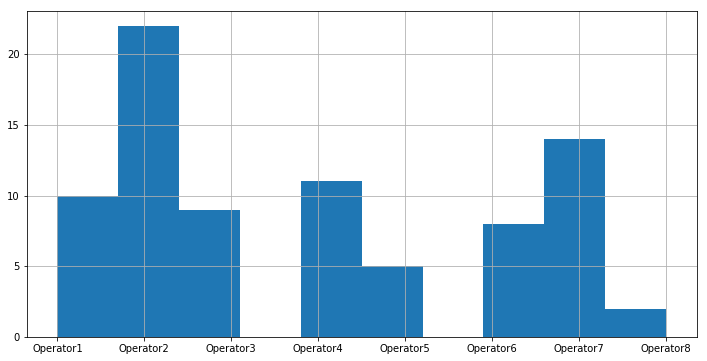

In [14]:
raw_df['Operator'][data['failure'] == 1].hist(figsize=(12, 6))

In [15]:
raw_df['Operator'].value_counts()

Operator2    1952
Operator7     976
Operator5     976
Operator3     976
Operator6     976
Operator1     976
Operator8     976
Operator4     976
Name: Operator, dtype: int64

Operator2 is the available operator during most of the failures, but they are also available twice as often as the rest of the operators.

In [18]:
sensor_readings = raw_df[[f'Measure{i}' for i in range(1, 16)]]

In [25]:
sensor_readings[data['failure'] == 0].describe()

,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15
count,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000
mean,1091.280018,1.490865,0.999081,1072.045846,1075.206481,1075.846605,1086.252212,1078.296909,1082.743422,1081.428588,1089.439733,1088.137539,1076.169252,1087.757670,1082.125704
std,537.331586,1.115128,0.816824,536.569867,532.990545,533.678537,538.492961,537.179775,533.113779,537.363433,535.027400,533.655995,535.326365,537.180277,537.498390
min,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
25%,628.500000,0.000000,0.000000,609.000000,605.000000,623.500000,620.000000,614.000000,632.500000,618.500000,628.000000,627.000000,609.000000,616.500000,614.500000
50%,1097.000000,1.000000,1.000000,1058.000000,1076.000000,1072.000000,1089.000000,1075.000000,1079.000000,1077.000000,1094.000000,1082.000000,1067.000000,1088.000000,1076.000000
75%,1555.000000,2.000000,2.000000,1533.000000,1540.000000,1537.000000,1558.000000,1542.500000,1532.500000,1546.000000,1550.000000,1552.000000,1539.000000,1559.000000,1550.000000
max,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000


In [20]:
sensor_readings[data['failure'] == 1].describe()

,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.00000,81.000000
mean,1050.111111,1.382716,1.012346,1026.938272,1142.049383,1095.061728,1156.185185,967.716049,1003.703704,1187.098765,1011.296296,1108.938272,1139.777778,1147.37037,1111.037037
std,512.887146,1.167989,0.782525,532.362009,550.313658,571.196996,503.478577,529.937478,515.948143,554.129579,529.166407,496.138775,510.714451,546.42544,543.254371
min,166.000000,0.000000,0.000000,174.000000,160.000000,165.000000,173.000000,166.000000,160.000000,170.000000,174.000000,174.000000,258.000000,157.00000,244.000000
25%,725.000000,0.000000,0.000000,466.000000,695.000000,586.000000,772.000000,493.000000,551.000000,698.000000,554.000000,678.000000,664.000000,666.00000,579.000000
50%,970.000000,1.000000,1.000000,1074.000000,1201.000000,1094.000000,1098.000000,938.000000,992.000000,1273.000000,952.000000,1077.000000,1154.000000,1103.00000,1066.000000
75%,1484.000000,2.000000,2.000000,1457.000000,1645.000000,1536.000000,1542.000000,1394.000000,1401.000000,1641.000000,1505.000000,1546.000000,1595.000000,1655.00000,1603.000000
max,1975.000000,3.000000,2.000000,1959.000000,1984.000000,1993.000000,2007.000000,2004.000000,2001.000000,1985.000000,1927.000000,2005.000000,1972.000000,1998.00000,1973.000000


In [24]:
sensor_readings[data['failure'] == 0].describe() - sensor_readings[data['failure'] == 1].describe()

,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000
mean,41.168907,0.108149,-0.013265,45.107575,-66.842902,-19.215124,-69.932973,110.580860,79.039718,-105.670178,78.143437,-20.800733,-63.608526,-59.612701,-28.911333
std,24.444440,-0.052861,0.034299,4.207858,-17.323113,-37.518460,35.014383,7.242296,17.165636,-16.766146,5.860993,37.517221,24.611915,-9.245163,-5.755981
min,-11.000000,0.000000,0.000000,-19.000000,-5.000000,-10.000000,-18.000000,-11.000000,-5.000000,-15.000000,-19.000000,-19.000000,-103.000000,-2.000000,-89.000000
25%,-96.500000,0.000000,0.000000,143.000000,-90.000000,37.500000,-152.000000,121.000000,81.500000,-79.500000,74.000000,-51.000000,-55.000000,-49.500000,35.500000
50%,127.000000,0.000000,0.000000,-16.000000,-125.000000,-22.000000,-9.000000,137.000000,87.000000,-196.000000,142.000000,5.000000,-87.000000,-15.000000,10.000000
75%,71.000000,0.000000,0.000000,76.000000,-105.000000,1.000000,16.000000,148.500000,131.500000,-95.000000,45.000000,6.000000,-56.000000,-96.000000,-53.000000
max,36.000000,0.000000,0.000000,52.000000,27.000000,18.000000,4.000000,7.000000,10.000000,26.000000,84.000000,6.000000,39.000000,13.000000,38.000000


Means of sensor readings at failure are not abnormal, all within one standard deviation.

The minimums and maximums for all measures are the same, which is kind of weird.

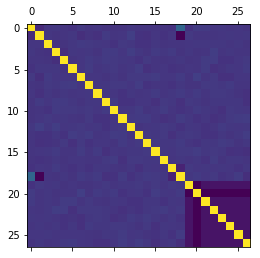

In [28]:
plt.matshow(data.corr())

In [32]:
train, test = train_test_split(data, test_size=.2)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('failure', axis=1).values, data['failure'].values)